# Data download 

In [1]:
import datetime

weeks = []

date_format = "%Y-%m-%d"
d1 = datetime.datetime.strptime("2016-12-29", date_format).date()
d2 = datetime.datetime.strptime("2020-08-06", date_format).date()
d = d1
step = datetime.timedelta(days=7)

 

while d < d2:
    #print(d.strftime(date_format))
    weeks.append(d)
    d += step
    


In [2]:
week_tail = []
week_head = []
for date in weeks:
    date+=datetime.timedelta(days=1)
    end_date = date
    #end_date= end_date.strftime(date_format)    
    week_tail.append(end_date)
    
    start_date = end_date - datetime.timedelta(days=7)
    #end_date= end_date.strftime(date_format)    
    week_head.append(start_date)
    
#print('tails')
#print(week_tail)

#print('heads')
#print(week_head)

In [3]:
weeks = []
for n in range(len(week_tail)):
    week = str(week_head[n]) + '--' + str(week_tail[n])
    weeks.append(week)
    print(week)

print(weeks)

2016-12-23--2016-12-30
2016-12-30--2017-01-06
2017-01-06--2017-01-13
2017-01-13--2017-01-20
2017-01-20--2017-01-27
2017-01-27--2017-02-03
2017-02-03--2017-02-10
2017-02-10--2017-02-17
2017-02-17--2017-02-24
2017-02-24--2017-03-03
2017-03-03--2017-03-10
2017-03-10--2017-03-17
2017-03-17--2017-03-24
2017-03-24--2017-03-31
2017-03-31--2017-04-07
2017-04-07--2017-04-14
2017-04-14--2017-04-21
2017-04-21--2017-04-28
2017-04-28--2017-05-05
2017-05-05--2017-05-12
2017-05-12--2017-05-19
2017-05-19--2017-05-26
2017-05-26--2017-06-02
2017-06-02--2017-06-09
2017-06-09--2017-06-16
2017-06-16--2017-06-23
2017-06-23--2017-06-30
2017-06-30--2017-07-07
2017-07-07--2017-07-14
2017-07-14--2017-07-21
2017-07-21--2017-07-28
2017-07-28--2017-08-04
2017-08-04--2017-08-11
2017-08-11--2017-08-18
2017-08-18--2017-08-25
2017-08-25--2017-09-01
2017-09-01--2017-09-08
2017-09-08--2017-09-15
2017-09-15--2017-09-22
2017-09-22--2017-09-29
2017-09-29--2017-10-06
2017-10-06--2017-10-13
2017-10-13--2017-10-20
2017-10-20-

In [4]:
states = ['br']


In [5]:
#NB: some files download fails because the data is missing on the spotify charts. Check them by hand with the else statement
import requests
import os
import time
path = os.getcwd()

for state in states:
    dir_path = os.path.join(path, state)
    os.mkdir(dir_path)
    for week in weeks:
        csv_url = 'https://spotifycharts.com/regional/'+state+'/weekly/'+week+'/download'
        req = requests.get(csv_url)
        #print(req.status_code)
        time.sleep(0.5)
        if req.status_code == 200:
            url_content = req.content
            csv = ''+state+'_'+week+'.csv'
            csv_path = os.path.join(dir_path, csv)
            csv_file = open(csv_path, 'wb')

            csv_file.write(url_content)
            csv_file.close()
        else:
            print('error with the following file:'+str(csv_url))

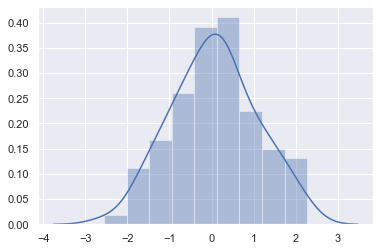